In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
events_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip', compression ='zip')

In [4]:
events_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [28]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')
events_data['day'] = events_data.date.dt.date

events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


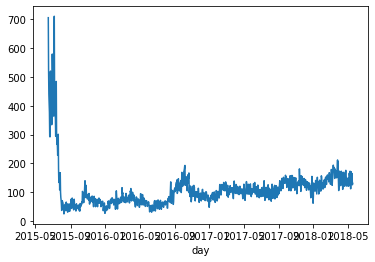

In [6]:
events_data.groupby('day') \
    .user_id.nunique().plot()


In [7]:
events_data.groupby('day') \
    .user_id.nunique().head()

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

In [8]:
events_data.groupby('step_id') \
    .action.nunique().head()

step_id
30456    3
30462    3
30465    3
31955    3
31956    3
Name: action, dtype: int64

In [9]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}) \
    .rename(columns = {'step_id': 'passed_steps'}) \
    .head()

,user_id,passed_steps
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


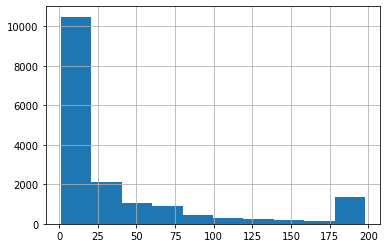

In [10]:
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}) \
    .rename(columns = {'step_id': 'passed_steps'}) \
    .passed_steps.hist()

In [11]:
# Это не верное решение так как мы убираем тех кто не сделал ни одного шага!
events_data[events_data.action == 'passed'] \
    .groupby('user_id', as_index = False) \
    .agg({'step_id': 'count'}) \
    .rename(columns = {'step_id': 'passed_steps'}).passed_steps.min()

1

In [12]:
# Разворачиваем данные. Круто!
events_data.pivot_table(index = 'user_id', columns='action', values='step_id', aggfunc = 'count',
                       fill_value=0)

action,discovered,passed,started_attempt,viewed
user_id,,,,
1,1,0,0,1
2,9,9,2,10
3,91,87,30,192
5,11,11,4,12
7,1,1,0,1
...,...,...,...,...
26790,8,8,1,9
26793,1,0,1,1
26794,69,69,34,180


In [13]:
# избавимся от сложной вложенной структуры индексов reset_index()
events_data.pivot_table(index = 'user_id', columns='action', values='step_id', aggfunc = 'count',
                       fill_value=0).reset_index()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


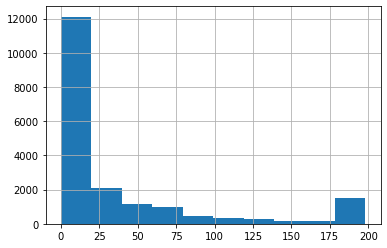

In [14]:
events_data.pivot_table(index = 'user_id', columns='action', values='step_id', aggfunc = 'count',
                       fill_value=0).reset_index().discovered.hist()

In [15]:
submissions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip',compression ='zip')
submissions_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [16]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit = 's')
submissions_data['day'] = submissions_data.date.dt.date
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [17]:
user_scores = submissions_data.pivot_table(index = 'user_id', 
                        columns='submission_status', 
                        values='step_id', 
                        aggfunc = 'count',
                        fill_value=0).reset_index()
user_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [17]:
# посмотрим на распределение перерывов в наших пользователей для того чтобы определить кого мы будем записывать в отчурнувшиеся с курса
churn_day_determ = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day'])
# убирем дупликаты только по паре 'user_id', 'day'
churn_day_determ

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230
...,...,...,...
3480298,364,2018-05-19,1526762223
3480329,22851,2018-05-19,1526762629
3480333,943,2018-05-19,1526762664
3480669,26659,2018-05-19,1526770439


In [19]:
# теперь для каждого пользователя соберем все timestamp и посмотрим на переывы между ними
churn_day_determ = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day']) \
        .groupby('user_id')['timestamp'].apply(list)
churn_day_determ

user_id
1                                             [1472827464]
2                                 [1514383364, 1519226966]
3        [1434358476, 1441257725, 1441440209, 144153391...
5                                 [1466156809, 1499859621]
7                                             [1521634660]
                               ...                        
26790     [1451484016, 1451722241, 1452616205, 1517495853]
26793                                         [1510225031]
26794    [1495287049, 1495373177, 1495509936, 149560483...
26797                             [1508425316, 1509993306]
26798                                         [1520975763]
Name: timestamp, Length: 19234, dtype: object

In [20]:
# теперь посчитаем перерывы!
churn_day_determ = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day']) \
        .groupby('user_id')['timestamp'].apply(list) \
        .apply(np.diff)
# разность между ближайшими наблюдениями
churn_day_determ

user_id
1                                                       []
2                                                [4843602]
3         [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                               [33702812]
7                                                       []
                               ...                        
26790                           [238225, 893964, 64879648]
26793                                                   []
26794    [86128, 136759, 94899, 1422583, 14347289, 5050...
26797                                            [1567990]
26798                                                   []
Name: timestamp, Length: 19234, dtype: object

In [22]:
# бахнем все в массив
churn_day_determ = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day']) \
        .groupby('user_id')['timestamp'].apply(list) \
        .apply(np.diff).values

In [23]:
# теперь из массива массива сделаем один массив
np.concatenate(churn_day_determ, axis = 0)

array([4843602, 6899249,  182484, ...,   98252,   57019, 1567990])

In [24]:
churn_day_determ_final = pd.Series(np.concatenate(churn_day_determ, axis = 0))
churn_day_determ_final

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int64

In [30]:
# разница в днях
churn_day_determ_final = churn_day_determ_final / (24 * 60 * 60)
churn_day_determ_final

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

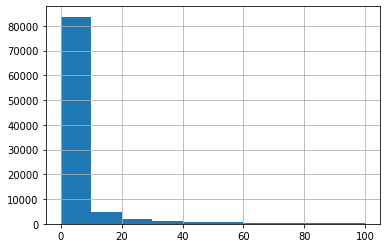

In [31]:
churn_day_determ_final[churn_day_determ_final < 100].hist()

In [32]:
churn_day_determ_final.quantile(0.95)

59.760440972222156

In [ ]:
# только 5 процентов пользоывателей возвращаются на курс после перерыва 59 дней!

In [33]:
churn_day_determ_final.quantile(0.90)


18.325995370370403

In [ ]:
# 90% укладываются в  перерывы 18 дней

In [64]:
# Введите id Анатолия Карпова, под которым он фигурирует в данных events_data_train и submissions_data_train.
# можно действовать через кто раньше решил например последний степ

events_data
events_data \
    .groupby('user_id',as_index = False) \
    .agg({'date': 'count'}).sort_values(by=['date'], ascending=False)

#1046 !

,user_id,date
15007,20907,33043
7780,10794,16436
18150,25279,10179
781,1046,9095
2611,3572,7905
...,...,...
14064,19546,2
0,1,2
8225,11437,1
6334,8773,1


In [ ]:
#
# Продолжаем дальше с пользователями
# получается наш чувак отвалившийся если он не появлялся 59 дней и не получил сертификат
# 

In [9]:
# максимаьный timestamp
users_data = events_data \
    .groupby('user_id',as_index = False) \
    .agg({'timestamp': 'max'}).rename(columns = {'timestamp': 'last_timestamp'})
users_data

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
...,...,...
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096


In [13]:
now = 1526772811
drop_out_threshold = 30*24*60*60
users_data['is_churn']= (now - users_data.last_timestamp) > drop_out_threshold
# отсутствовал больше чем 30 дней
users_data

,user_id,last_timestamp,is_churn
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [22]:
# добавим данные про количество правильных и неправильных сабмитов
users_data = users_data.merge(user_scores, how = 'outer')
users_data

,user_id,last_timestamp,is_churn,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,NaN,NaN
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [23]:
users_data = users_data.fillna(0)
users_data

,user_id,last_timestamp,is_churn,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [24]:
users_events_data = events_data.pivot_table(index = 'user_id',
                        columns='action', 
                        values='step_id', 
                        aggfunc = 'count',
                       fill_value=0).reset_index()
users_events_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [25]:
users_data = users_data.merge(users_events_data, how = 'outer')
users_data

,user_id,last_timestamp,is_churn,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,0.0,0.0,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [31]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()
users_days

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [32]:
users_data = users_data.merge(users_days, how = 'outer')
users_data

,user_id,last_timestamp,is_churn,correct,wrong,discovered,passed,started_attempt,viewed,day
0,1,1472827464,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,2


In [33]:
users_data.user_id.nunique()

19234

In [34]:
events_data.user_id.nunique()

19234

In [ ]:
# никого не потеряли!

In [36]:
# предположим успешное прохождение курса это проъождение 170 шагов
users_data['passed_course'] = users_data.passed > 170
users_data.groupby('passed_course').count()

,user_id,last_timestamp,is_churn,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [37]:
100 * 1425 / 17809

8.001572238755685

In [ ]:
# 8% это стандарт индустрии